<a href="https://colab.research.google.com/github/FilipeSquire/Statistics-Tools/blob/main/Centralidade_Distribuicao_Normal_e_Normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from scipy import stats

# Medidas de Centralidade

In [ ]:
#criando variaveis com dados
jogadores = [4000, 18000, 12000,25000, 3000, 14000, 300000, 40000, 800000]
np.mean(jogadores)

135111.11111111112

In [ ]:
np.median(jogadores)

18000.0

In [ ]:
#criar variavel para gerar quartis
quartis = np.quantile(jogadores, [0,0.25,0.5,0.75,1])
quartis

array([  3000.,  12000.,  18000.,  40000., 800000.])

In [ ]:
#desvio padrao
np.std(jogadores, ddof = 1)

266603.3779064157

In [ ]:
#visualizacao
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(3000, 800000), mean=135111.11111111112, variance=71077361111.11111, skewness=2.0039188929601632, kurtosis=2.501236288223838)

# Distribuicao Normal

In [ ]:
from scipy.stats import norm

In [ ]:
#Dado conjunto de objetos de média 8 e desvpad 2
#Qual a probabilidade de tirar um objeto com peso <6kg?
norm.cdf(6, 8, 2) #cdf para probabilidades a esquerda (menor q media)

0.15865525393145707

In [ ]:
#Qual a probabilidade de tirar um objeto >6kg?
norm.sf(6,8,2) #sf para probabilidades a direita (maior q media)
1 - norm.cdf(6,8,2)

0.8413447460685429

In [ ]:
#Qual a probabilidade de tirar um objeto que o peso é <6kg ou >10kg?
norm.cdf(6,8,2) + norm.sf(10,8,2)

0.31731050786291415

In [ ]:
#Qual a probabilidade de tirar um objeto com peso <10 e >8?
norm.cdf(10,8,2) - norm.cdf(8,8,2)

0.3413447460685429

# Teste de Normalidade

In [ ]:
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [ ]:
#Criacao de variavel com dados em uma distribuicao normal
dados = norm.rvs(size = 1000)
dados

array([-3.21093113e-01, -1.21038189e+00,  9.95100607e-01,  3.62405176e-01,
        1.02996790e+00,  9.46105371e-01, -1.76342745e+00, -1.40639623e+00,
       -1.45488398e+00, -3.97828529e-01, -9.06954155e-02,  1.90598426e+00,
        4.83865440e-01, -7.90331907e-01, -1.04640022e+00,  1.71031081e-01,
       -8.95039863e-01,  6.65394795e-01, -2.95501260e-01,  1.36487150e+00,
       -1.41543462e+00, -6.42300217e-01, -2.32189605e+00,  4.37386945e-01,
       -4.80191989e-01, -1.64331915e+00,  9.78333292e-01, -8.42664178e-01,
       -1.55845842e+00,  1.41712574e-01, -3.26357341e-01, -2.98085027e-01,
        6.57898503e-01,  7.51861634e-01, -3.48568511e-01, -1.28417540e+00,
        1.43306616e+00, -4.31953464e-01,  2.72286810e-02, -8.42821359e-01,
        1.85006649e-01,  1.19359606e+00,  3.23661545e-01, -1.32892813e-01,
       -7.99077827e-01, -1.19656503e+00,  5.01044312e-01,  6.82142160e-01,
       -1.71186705e+00, -4.32666446e-01,  7.59053919e-01,  1.28325651e+00,
       -2.28065267e-01, -

Text(0.5, 1.0, 'Dados')

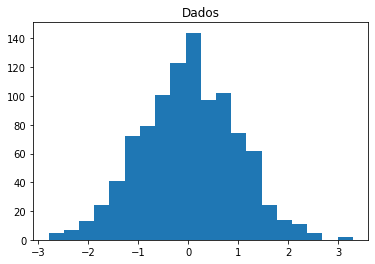

In [ ]:
#histograma
plt.hist(dados, bins = 20)
plt.title('Dados')

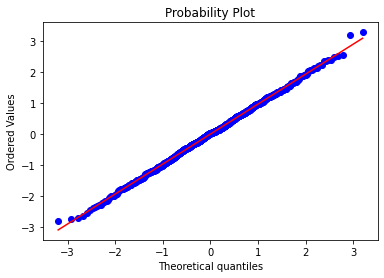

In [ ]:
#verificacao se é distribuicao normal
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax) #QQ PLOT
plt.show()

# Teste de Shapiro

In [ ]:
#segundo argumento é o valor de p, onde nao ha como rejeitar a hipotese nula
#alfa de 0,05
#hipotese nula é que os dados estão normalmente distribuidos
stats.shapiro(dados)

ShapiroResult(statistic=0.9990639686584473, pvalue=0.9040948152542114)

In [ ]:
#Dados nao normais

dados2 = skewnorm.rvs(4, size=1000) #base enviesada

Text(0.5, 1.0, 'Dados')

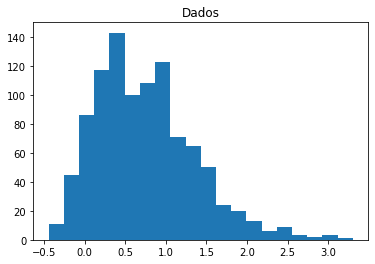

In [ ]:
#histograma
plt.hist(dados2, bins = 20)
plt.title('Dados')

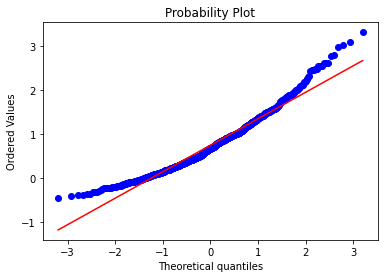

In [ ]:
#Verificar dist normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [ ]:
print(stats.shapiro(dados2)) #valor em not. cientifica -15, muito baixo. Hipotese pode ser rejeitada
print(stats.shapiro(dados)) #valor acima de alfa, nao pode ser rejeitado

ShapiroResult(statistic=0.9624767899513245, pvalue=2.3361839958884302e-15)
ShapiroResult(statistic=0.9990639686584473, pvalue=0.9040948152542114)
